# Class 11: part 2 

NYU Tandon C4SUE @avigailvantu , April 2020

## Polygons, merging, more mapping features, and creating choropleth maps 

In [145]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline 

import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon


## States boundries from the Census Buraeu 

In [2]:


states = gpd.read_file('cb_2018_us_state_500k')

In [4]:
states.head() 

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


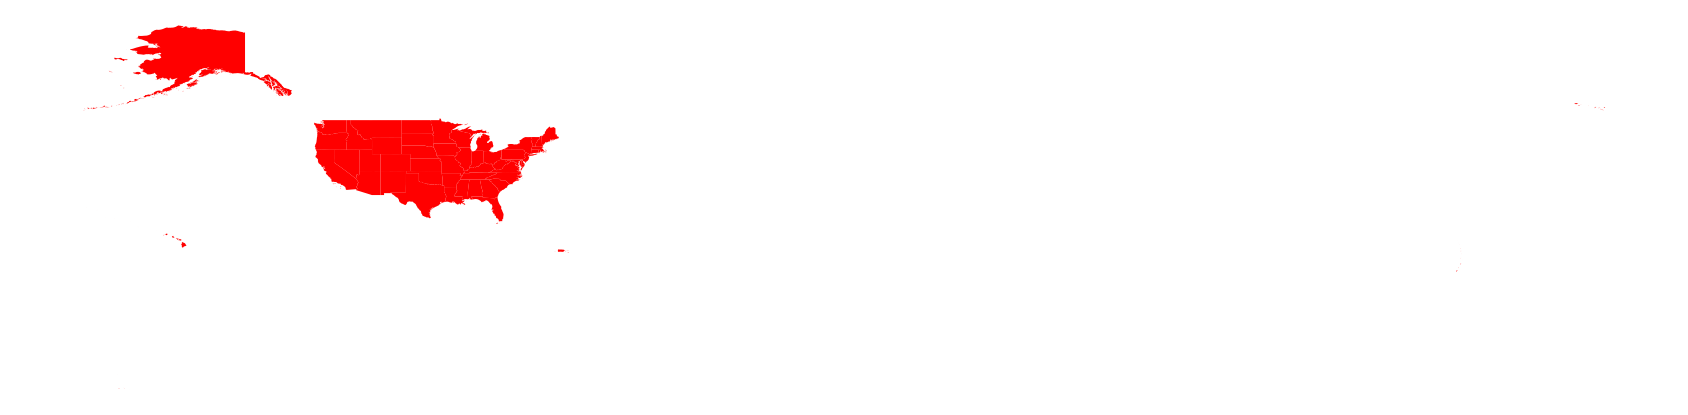

In [18]:
states.plot( color='red',legend=True,figsize=(30, 12),markersize=0.1)
plt.axis('off')
plt.show()

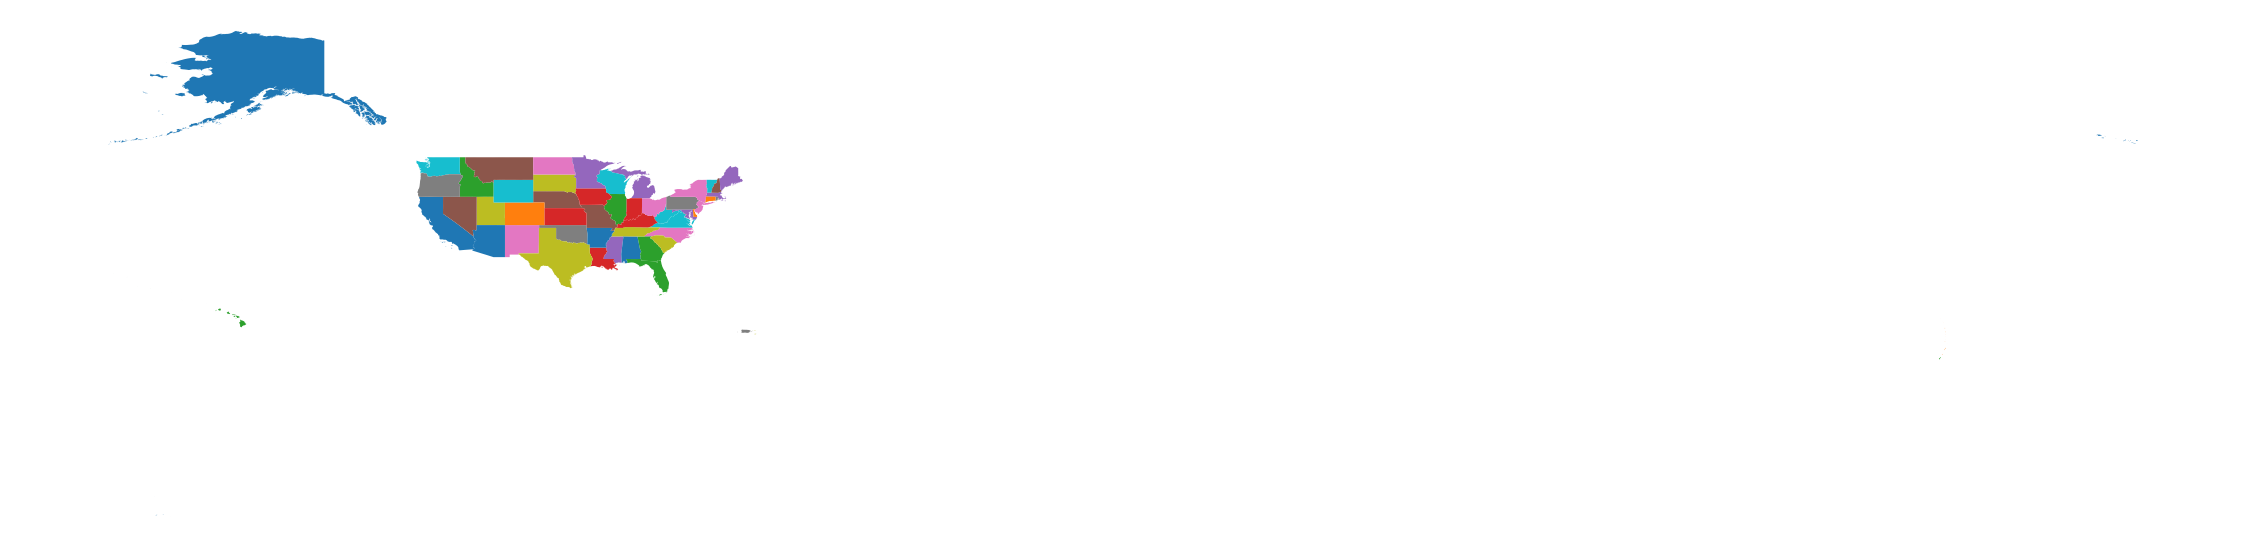

In [20]:
states.plot( column='NAME',legend=False,figsize=(40, 10),markersize=0.1)
plt.axis('off')
plt.show()

In [29]:
states['state'] = states['NAME']

again: covid-19 data from the NYT 

my data is up to date as of April 18th 

https://github.com/nytimes/covid-19-data

In [21]:
#Load data

covidUS = pd.read_csv('us-states.csv')

In [22]:
covidUS.shape

(2609, 5)

In [24]:
#let's see the data  

covidUS.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [25]:
covidUS.tail()

,date,state,fips,cases,deaths
2604,2020-04-18,Virginia,51,8053,258
2605,2020-04-18,Washington,53,11802,629
2606,2020-04-18,West Virginia,54,825,18
2607,2020-04-18,Wisconsin,55,4199,212
2608,2020-04-18,Wyoming,56,309,2


In [26]:
#filter as of the last day in the data

april18 = covidUS[covidUS['date']== '2020-04-18']

In [28]:
april18.head(20)

,date,state,fips,cases,deaths
2553,2020-04-18,Alabama,1,4723,147
2554,2020-04-18,Alaska,2,312,7
2555,2020-04-18,American Samoa,60,0,0
2556,2020-04-18,Arizona,4,4719,181
2557,2020-04-18,Arkansas,5,1777,38
2558,2020-04-18,California,6,30829,1146
2559,2020-04-18,Colorado,8,9433,409
2560,2020-04-18,Connecticut,9,17550,1086
2561,2020-04-18,Delaware,10,2538,67
2562,2020-04-18,District of Columbia,11,2666,91


In [30]:
states = states.merge(april18, on='state')

In [31]:
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state,date,fips,cases,deaths
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",Mississippi,2020-04-18,28,3974,152
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",North Carolina,2020-04-18,37,6140,175
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",Oklahoma,2020-04-18,40,2570,139
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",Virginia,2020-04-18,51,8053,258
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",West Virginia,2020-04-18,54,825,18
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",Louisiana,2020-04-18,22,23580,1267
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",Michigan,2020-04-18,26,30717,2307
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",Massachusetts,2020-04-18,25,36372,1560
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",Idaho,2020-04-18,16,1577,44
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",Florida,2020-04-18,12,25484,747


## Set a map x and y range

Often the deafult of the map that will be plotted will not show the map in its ideal range. For example: 


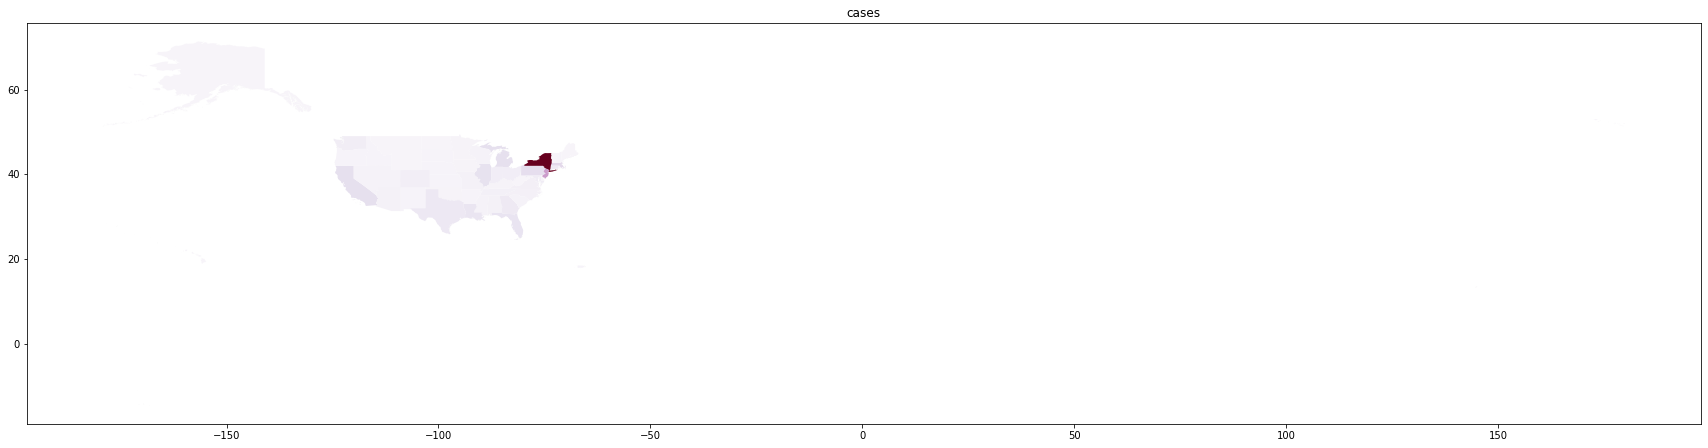

In [71]:
states.plot(column='cases',figsize=(30, 10),cmap='PuRd')

plt.title('cases')
plt.show()

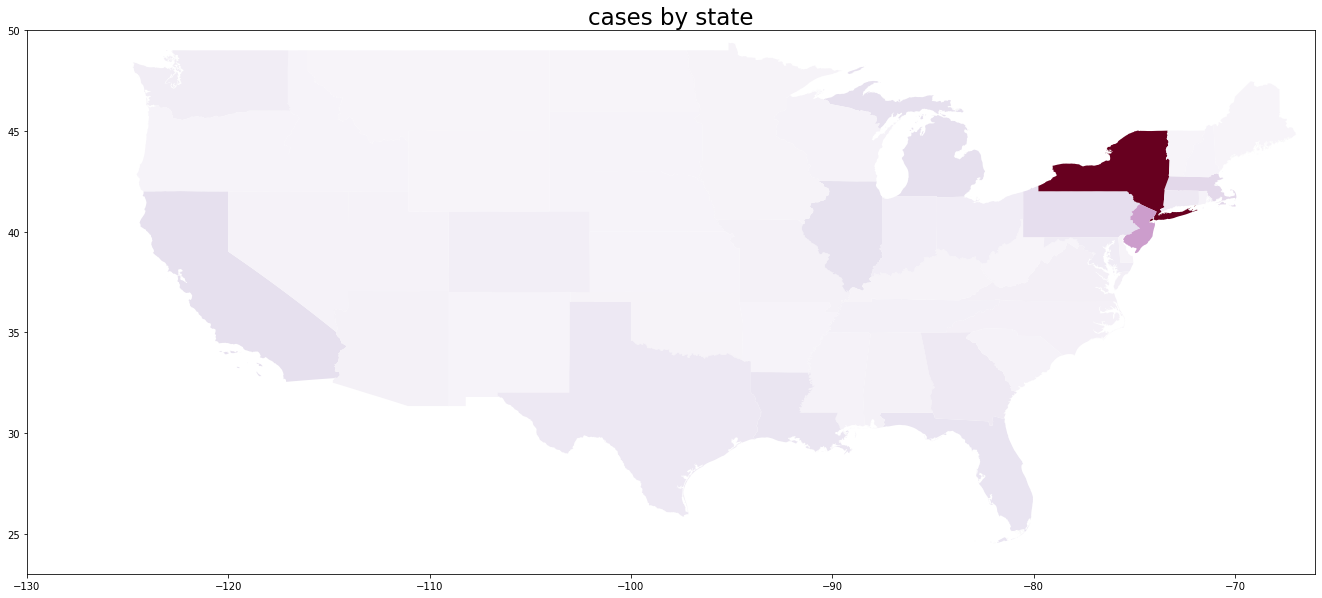

In [74]:
states.plot(column='cases',figsize=(60, 10),cmap='PuRd')

plt.title('cases by state')
plt.ylim((23,50))
plt.xlim((-130,-66))
plt.show()

And final touches-->

- remove axis, 
- adjust title + its size & color 
- add legend


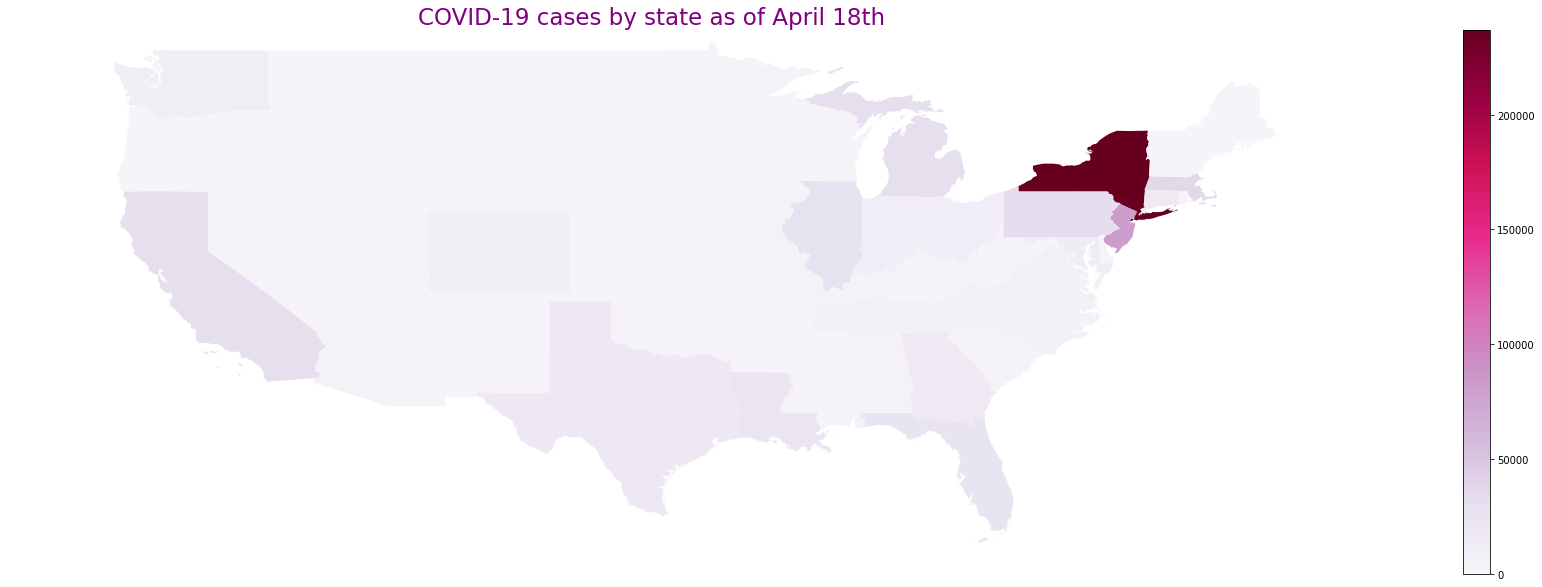

In [82]:
states.plot(column='cases',legend=True, figsize=(60, 10),cmap='PuRd')
plt.axis('off')
plt.title('COVID-19 cases by state as of April 18th', fontsize=23, color ='purple')
plt.ylim((23,50))
plt.xlim((-130,-66))
plt.show()

In [116]:
#len(states)

In [108]:
#states = states[ states['state'] != 'Guam']

In [115]:
#remove guam 


#len(states[ states['state'] != 'Guam'])



In [111]:
#states["center"] = states["geometry"].centroid
#states_points = states.copy()
#states_points.set_geometry("center", inplace = True)

/Users/avigailvantu/Documents/ComputingClass/class_11/c4sue_venv1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
#ax = states.plot(figsize = (15, 12), column = "cases", edgecolor = "lightgrey", linewidth = 0.5)
#texts = []

#for x, y, label in zip(states_points.geometry.x, states_points.geometry.y, states_points["NAME"]):
 #   texts.append(plt.text(x, y, label, fontsize = 8))
    

#plt.show()


# Prep to zoom into the the tri-state area 

To do so first let's plo the axis again so we can see the range 

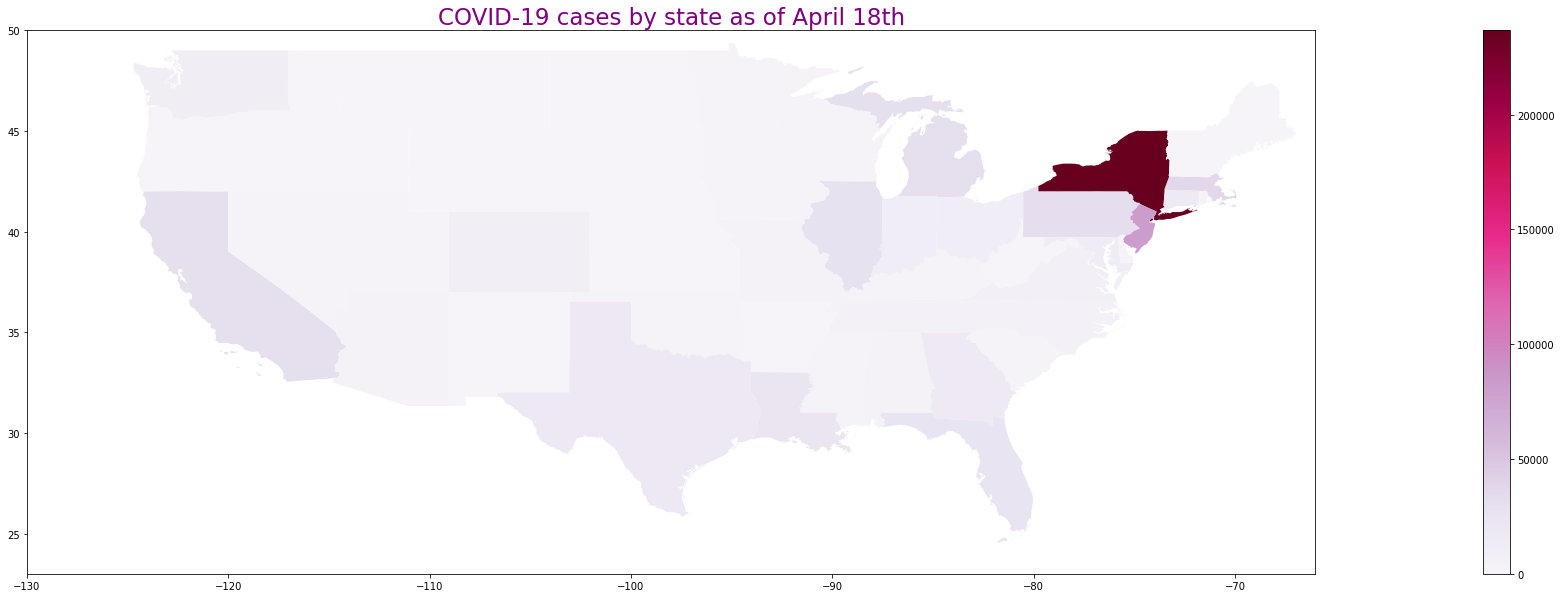

In [117]:
states.plot(column='cases',legend=True, figsize=(60, 10),cmap='PuRd')
#plt.axis('off')
plt.title('COVID-19 cases by state as of April 18th', fontsize=23, color ='purple')
plt.ylim((23,50))
plt.xlim((-130,-66))
plt.show()

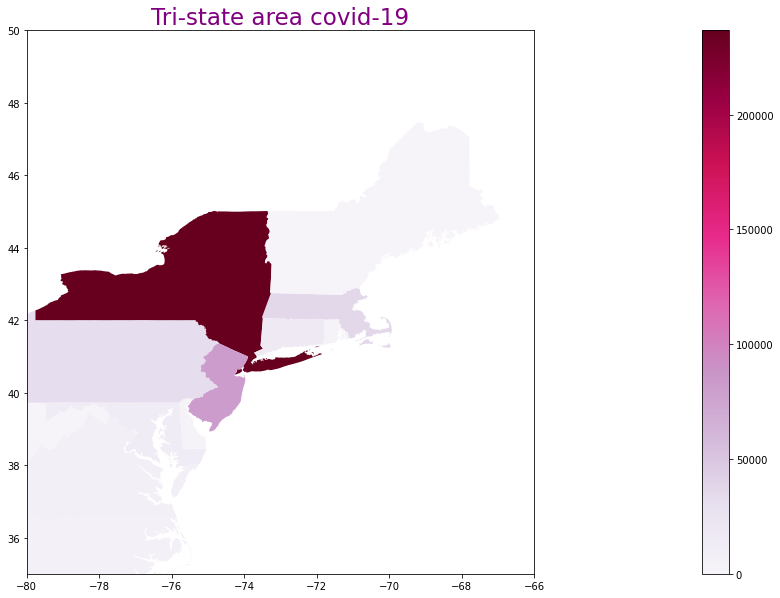

In [121]:
states.plot(column='cases',legend=True, figsize=(60, 10),cmap='PuRd')
#plt.axis('off')
plt.title('Tri-state area covid-19', fontsize=23, color ='purple')
plt.ylim((35,50))
plt.xlim((-80,-66))
plt.show()

# Plot Multiple Plots Side-By-Side 

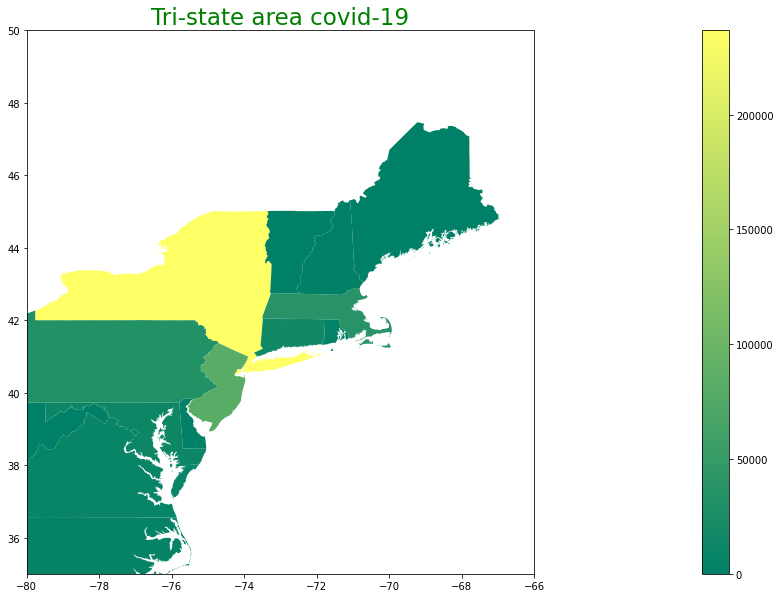

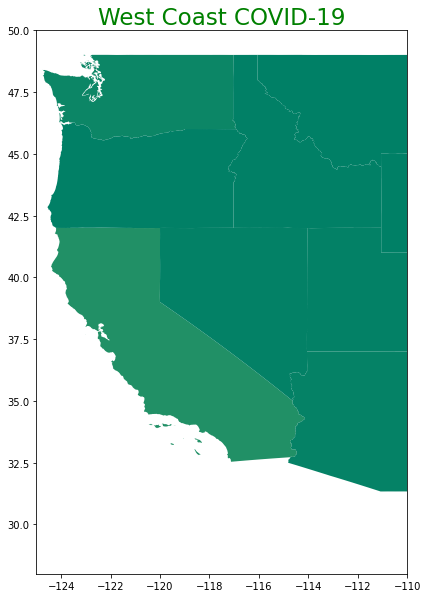

In [144]:
#1.tri-state area 
ax1 = states.plot(column='cases',legend=True, figsize=(60, 10),cmap='summer') 
plt.title('Tri-state area covid-19', fontsize=23, color ='green')
plt.ylim((35,50))
plt.xlim((-80,-66))
plt.show()

#2. west coast 
ax2 = states.plot(column='cases', figsize=(60, 10),cmap='summer')
plt.title('West Coast COVID-19', fontsize=23, color ='green')
plt.ylim((28,50))
plt.xlim((-125,-110))
plt.show()



# Task 1: 

Can you plot 2 plots of the deaths in the us:
1. For March 3rd, 2020
2. For April 18th, 2020 

* What are some of the trends you found? 

# Task 2: 

Shifting to working with the NYS data.

In the past few days we heard Gov. Andrew M. Cuomo of New York, saying cases are going down and that the state is over the peak of COVID-19. Looking into the data for New York State only-- do you agree or disagree? How did the data 
1. filter the data so you only have data for NYS. 
2. create plots/maps and tables to help you understand the trends 
3. consider using the rolling mean to help you understand the 

Hint: look into class 8 materials for some useful code on filtering & re-arranging the data. 
Remember to calculate the number of new cases *per day* to understand recent trends. 

# Optional: Task 3: 

1. Looking futhre into the NYS cases are we seeing the same trends for both deaths and cases? 
2. If different patterns--why do you think we are seeing these diffrences? 